In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

loading the dataset

In [2]:
data_dir = "D:/ml_practice/spamorham"
df = pd.read_csv(data_dir + '/spam.csv', encoding='latin-1')  
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Drop column and name change
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"text"})
df.tail()

,label,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X_train,X_test,y_train,y_test = train_test_split(df["text"],df["label"], test_size = 0.2, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [ ]:
vectorize the text

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)
print(vect.get_feature_names()[0:100])
print(vect.get_feature_names()[-100:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '0796xxxxxx', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701213186', '08701417012', '08701417012150p', '0870141701216', '087016248'

In [8]:
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [14]:
ham_words = ''
spam_words = ''
spam = df[df.label_num == 1]
ham = df[df.label_num ==0]

we are gonna remove some stop words which won't give us any useful information

In [16]:
import nltk
from nltk.corpus import stopwords
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

Use Multinomial Naive Bayes Classifier

In [17]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)
prediction["Multinomial"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["Multinomial"])

0.98834080717488793

try Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)
prediction["Logistic"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["Logistic"])

0.98026905829596411

try randomforest

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)
prediction["random_forest"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["random_forest"])

0.96591928251121073

try adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)
prediction["adaboost"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["adaboost"])

0.96771300448430497

In [21]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       965
       Spam       0.97      0.95      0.96       150

avg / total       0.99      0.99      0.99      1115



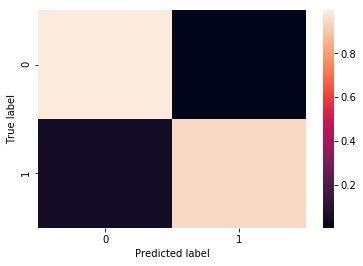

In [22]:
import seaborn as sns
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [23]:
print(conf_mat)

[[960   5]
 [  8 142]]


we can see that our simple Naive Bayes classifier is better than others.

I think the reason is the strong independence between features so we can almost achieve Bayes Optimal Classifier